<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/Eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/RiverGao/Face-Recognition/raw/master/faces94.zip
!unzip /content/faces94.zip

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2 
from sklearn.preprocessing import StandardScaler
import random

In [10]:
path = '/content/faces94'
images_list = glob.glob(path+'/*/*/*.1.jpg',recursive = True)
img_num = random.choice(range(len(images_list)))
test_image_path=images_list[img_num]
test_img = cv2.imread(test_image_path,0)
test_img = test_img.reshape(test_img.shape[0]*test_img.shape[1],1)
img_length = test_img.shape[0]


In [11]:
def load_img(path,img_length):
    
    img_array = np.empty((img_length,1))
    for image_path in images_list:
        img = cv2.imread(image_path,0)
        img = img.reshape(img.shape[0]*img.shape[1],1)
        img_array = np.column_stack((img_array,img))
    
    fin_img_array = img_array[:,1:]
    return fin_img_array

img_array = load_img(path,img_length)

In [21]:
n_comp = 70

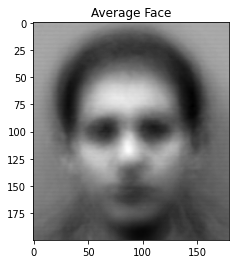

In [22]:
def stand_data(img_array):
    
    avg_img = np.mean(img_array,axis=1).reshape(img_array.shape[0],1)
    plt.imshow(avg_img.reshape(200,180),'gray')
    plt.title('Average Face')
    stand_img_array=(img_array-np.mean(img_array,axis=0))/np.std(img_array)
    return stand_img_array, avg_img

stand_img_array, avg_img = stand_data(img_array)


In [23]:
def eig(stand_img_array):
    
    c = np.cov(stand_img_array.T)
    eig_val, eig_vec = np.linalg.eig(c)
    eig_val = eig_val.reshape(eig_val.shape[0],1)
    sort_idx = np.argsort(eig_val[:,0])[::-1]
    eig_vec_sort = eig_vec[:,sort_idx]
    return eig_val, eig_vec_sort

eig_val, eig_vec_sort = eig(stand_img_array)

In [34]:
eig_faces_norm.shape

(70, 36000)

In [24]:
def eig_face(stand_img_array,eig_vec_sort,n_comp):
    
    eig_faces_norm = np.zeros((n_comp,img_array.shape[0]))
    for i in range(len(eig_faces_norm)):
        eig_faces = np.dot(stand_img_array,eig_vec_sort.T[i])
        eig_faces_norm[i] = eig_faces/np.linalg.norm(eig_faces)
    eig_faces_norm_n_comp = eig_faces_norm[0:n_comp]
    return eig_faces_norm_n_comp

eig_faces_norm = eig_face(stand_img_array,eig_vec_sort,n_comp)

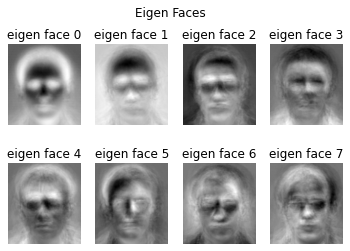

In [48]:
for i in range(8):
    img = eig_faces_norm[i].reshape(200,180)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.title('eigen face '+ str(i))
    plt.axis('off')
plt.suptitle('Eigen Faces')
plt.show()


In [25]:
def weights(img_array,eig_faces_norm,avg_img,img_num):
    weight = np.dot(eig_faces_norm , (img_array[:,img_num].reshape(img_array.shape[0],1) - avg_img))
    return weight

weight = weights(img_array,eig_faces_norm,avg_img,img_num)

In [26]:
def img_recon(eig_faces_norm,weight,avg_img):

    a = (np.dot(weight.T , eig_faces_norm)).reshape(eig_faces_norm.shape[1],1)
    recon_img = a + avg_img
    return recon_img
        
recon_img = img_recon(eig_faces_norm,weight,avg_img)

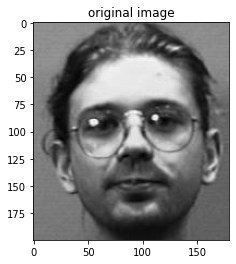

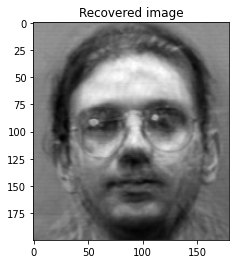

In [29]:
original_img_plot = plt.imshow(img_array[:,img_num].reshape(200,180),'gray')
plt.title('original image')
plt.show()
recon_img_plot = plt.imshow(recon_img.reshape(200,180),'gray')
plt.title('Recovered image')
plt.show()